In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

"Imported the necessary libraries"

'Imported the necessary libraries'

In [23]:
data_frame = pd.read_csv('weather_forecast.csv')

In [24]:
data_frame.head(14)

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [25]:
data_frame.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [26]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [27]:
data_frame.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [28]:
# check for redundant data
data_frame.duplicated().sum()

0

In [29]:
# drop the redundant data
data_frame.drop_duplicates(inplace=True)


In [40]:
le = LabelEncoder()

data_frame['Outlook'] = le.fit_transform(data_frame['Outlook'])
data_frame['Temperature'] = le.fit_transform(data_frame['Temperature'])
data_frame['Humidity'] = le.fit_transform(data_frame['Humidity'])
data_frame['Windy'] = le.fit_transform(data_frame['Windy'])
data_frame['Play'] = le.fit_transform(data_frame['Play'])


## Encoding

- for `outlook`, `temperature`, `humidity`, `windy`, `play`:
    - `outlook`: sunny=2, overcast=0, rainy=1
    - `temperature`: hot=1, mild=2, cool=0
    - `humidity`: high=0, normal=1
    - `windy`: Strong=0, Weak=1
    - `play`: no=0, yes=1

In [41]:
data_frame.head(14)

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [48]:
# split the data into features and target

X = data_frame.drop('Play', axis=1)
y = data_frame['Play']


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train

,Outlook,Temperature,Humidity,Windy
11,0,2,0,0
2,0,1,0,1
13,1,2,0,0
9,1,2,1,1
1,2,1,0,0
7,2,2,0,1
10,2,2,1,0
3,1,2,0,1
0,2,1,0,1
5,1,0,1,0


In [60]:
X_test

,Outlook,Temperature,Humidity,Windy
8,2,0,1,1
6,0,0,1,0
4,1,0,1,1


In [63]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

In [64]:
Y_pred = gnb.predict(X_test)

In [69]:
# Evaluate the classifier
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)



Accuracy:  1.0
Confusion Matrix: 
 [[1 0]
 [0 2]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# Confusion Matrix

- True Positive (TP): The number of correct predictions that the occurrence is positive [1, 1]
- True Negative (TN): The number of correct predictions that the occurrence is negative [0, 0]
- False Positive (FP): The number of incorrect predictions that the occurrence is positive [0, 1]
- False Negative (FN): The number of incorrect predictions that the occurrence is negative [1, 0]


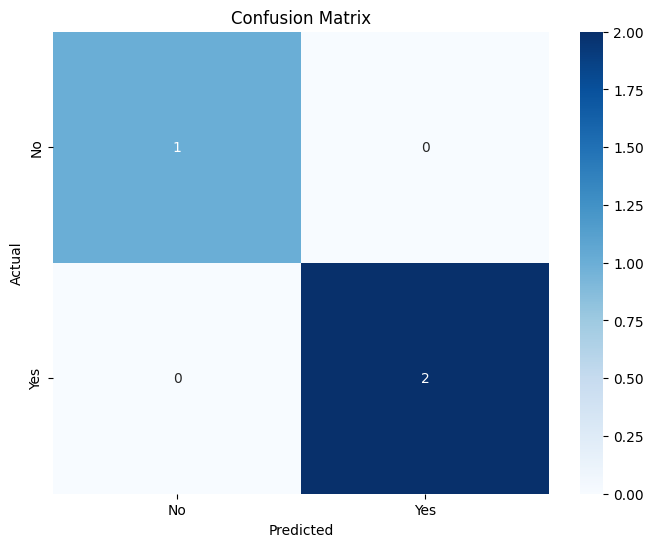

In [80]:
# Visualize the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




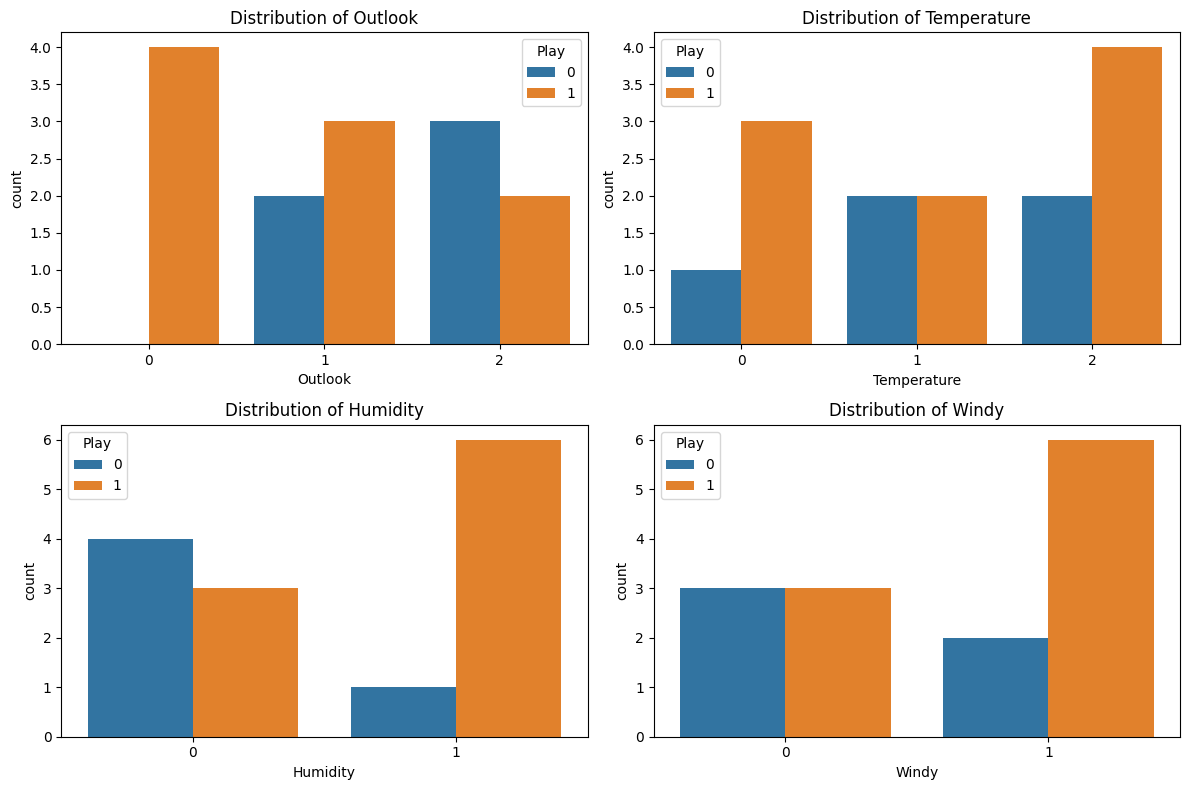

In [85]:
# Plot feature distribution with respect to the target variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data_frame, x=column, hue='Play')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

